# TASK 3 UNSUPERVISED LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
df['target']=iris.target
x=df.drop(columns=df[['target']])
y=df['target']


In [12]:
from sklearn.cluster import KMeans

In [18]:
k_range=range(1,10)
sse=[]
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(x,y)
    sse.append(kmeans.inertia_)
    

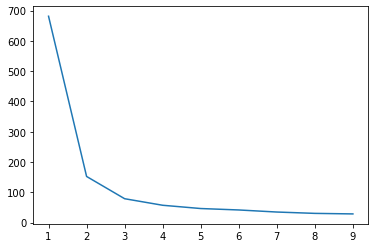

In [20]:
plt.plot(k_range,sse) #elbow rule

In [23]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(x,y)

In [24]:
df['clusters']=y_predicted

In [25]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [31]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]

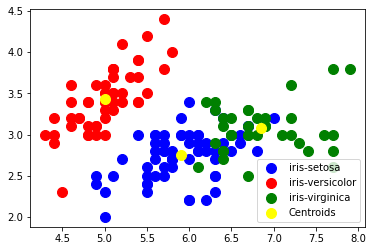

In [35]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],s=100,color='blue',label='iris-setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],s=100,color='red',label='iris-versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],s=100,color='green',label='iris-virginica')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],  s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
# visualization of iris data
